## KNN model

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the data
df = pd.read_csv("repurchase_training.csv")

In [3]:
df.drop("age_band", axis=1, inplace=True)
# Drop the ID column as it doesn't provide any valuable information
df.drop("ID", axis=1, inplace=True)

# Encode the categorical variables
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["car_model"] = le.fit_transform(df["car_model"])
df["car_segment"] = le.fit_transform(df["car_segment"])

# Split the data into training and testing sets
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the performance of the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/hemang/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[25573    35]
 [  285   375]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     25608
           1       0.91      0.57      0.70       660

    accuracy                           0.99     26268
   macro avg       0.95      0.78      0.85     26268
weighted avg       0.99      0.99      0.99     26268



Text(0.5, 1.0, 'Correlation Matrix')

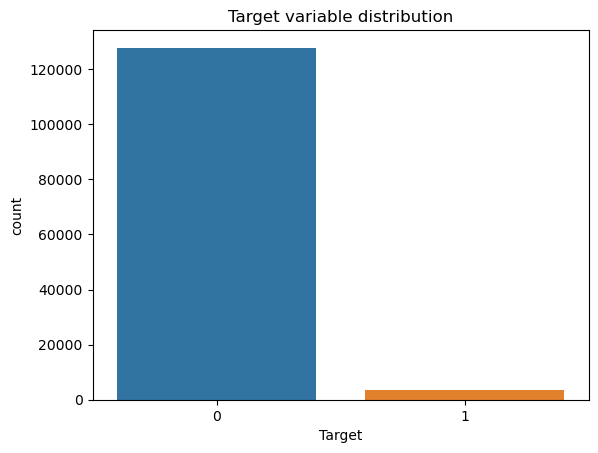

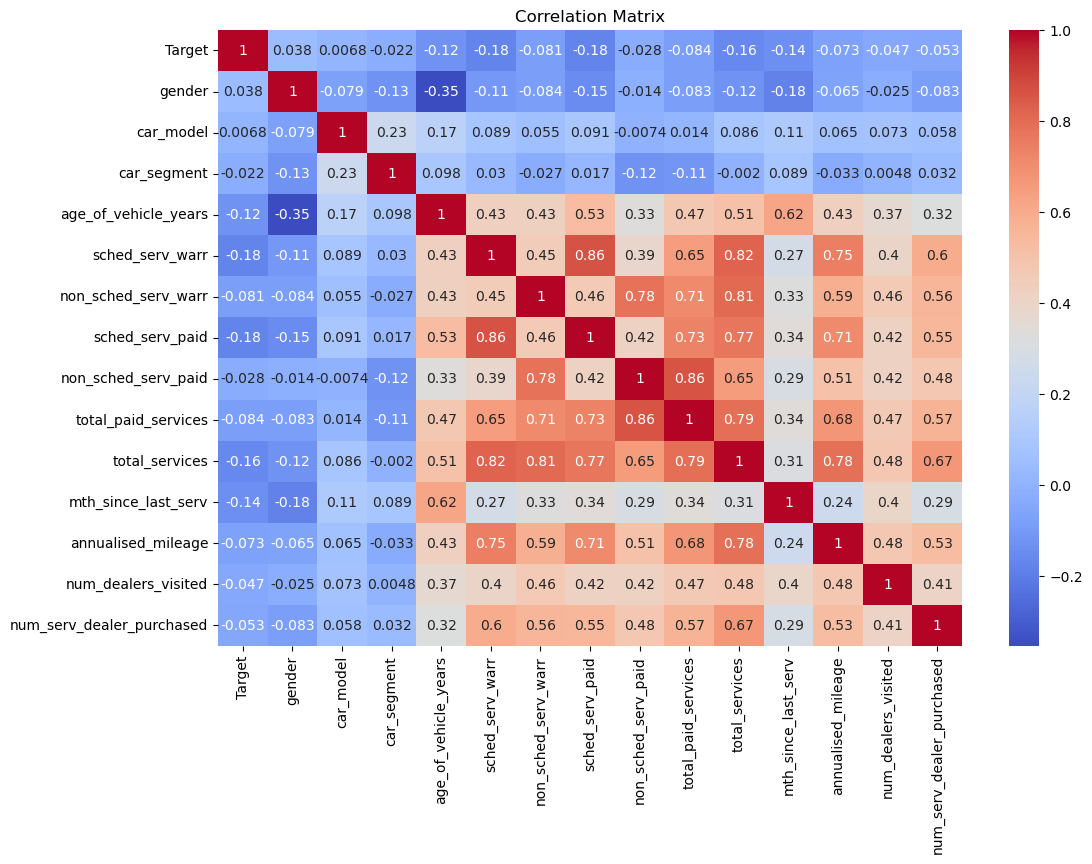

In [4]:
# Plotting the distribution of the target variable
sns.countplot(x='Target', data=df)
plt.title('Target variable distribution')

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')